In [32]:
# import the essential libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
import re
import nltk

from sklearn.feature_extraction.text import CountVectorizer


In [33]:
import pandas as pd
import random

# Base data for generating more rows
base_data = [
    ("She always handles the clerical work, while he makes the important decisions.", 1),
    ("John and Jane both work as engineers at the same company.", 0),
    ("Women are too emotional to handle leadership positions.", 1),
    ("Everyone should be treated equally regardless of gender.", 0),
    ("Men are naturally better at math than women.", 1),
    ("She is a fantastic nurse.", 1),
    ("Dr. Smith, regardless of gender, is a leading expert in the field.", 0),
    ("He is assertive, while she is aggressive.", 1),
    ("All employees are encouraged to participate in the workshop.", 0),
    ("She can't do that job because it's too technical.", 1),
    ("The team consists of talented individuals from diverse backgrounds.", 0),
    ("He is a born leader, and she is a born nurturer.", 1),
    ("The manager should not consider gender when hiring for the new position.", 0),
    ("Girls should play with dolls, and boys should play with cars.", 1),
    ("Both men and women have the capability to succeed in science and technology.", 0),
    ("She is always late because she has to take care of her children.", 1),
    ("Gender should not define one's career choices.", 0),
    ("Men are better at handling stressful situations than women.", 1),
    ("Anyone can apply for the position, regardless of gender.", 0),
    ("It's unusual for a woman to be in such a high position.", 1),
    ("He's a strong leader, and she's good at supporting roles.", 1),
    ("The company promotes gender equality in all its policies.", 0),
    ("Women aren't as good at negotiating as men.", 1),
    ("Everyone, regardless of gender, can contribute valuable insights.", 0),
    ("She works hard, but he has the talent.", 1),
    ("Gender does not determine someone's ability to excel in their job.", 0),
    ("She should focus on raising a family instead of working.", 1),
    ("Both men and women can excel in leadership roles.", 0),
    ("Men are naturally more logical than women.", 1),
    ("All genders should be given equal opportunities.", 0)
]

# Generate 1000 more rows
generated_data = [random.choice(base_data) for _ in range(2000)]

# Convert to DataFrame
data= pd.DataFrame(generated_data, columns=["text", "label"])

# Save to CSV
data.to_csv("extended_gender_text_classification_dataset.csv", index=False)

In [34]:
data

,text,label
0,Women aren't as good at negotiating as men.,1
1,"Dr. Smith, regardless of gender, is a leading ...",0
2,Gender should not define one's career choices.,0
3,She should focus on raising a family instead o...,1
4,The manager should not consider gender when hi...,0
...,...,...
1995,Men are naturally more logical than women.,1
1996,She can't do that job because it's too technical.,1
1997,"Dr. Smith, regardless of gender, is a leading ...",0
1998,She should focus on raising a family instead o...,1


In [35]:
# group the training dataset into gender discriminated and not gender discriminated
groups = data.groupby('label')
non_dis = groups.get_group(0)
dis = groups.get_group(1)

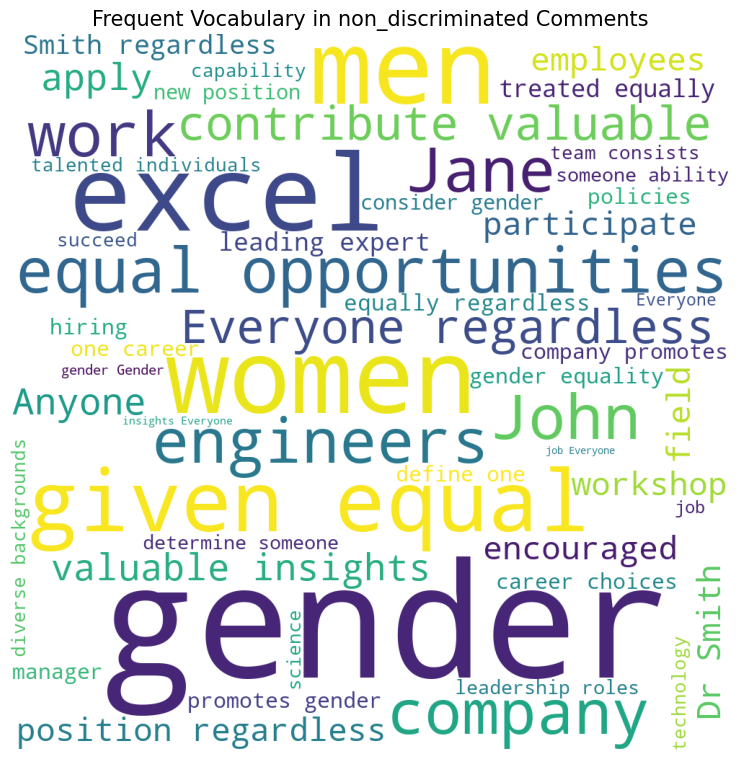

In [36]:
from wordcloud import WordCloud

combined_title = ' '.join(non_dis['text'])


# create a word cloud using the combined text
wordcloud_title = WordCloud(width = 1000, height = 1000,
                            background_color ='white',
                            min_font_size = 10).generate(combined_title)

# plot the WordCloud image
plt.figure(figsize=(10,8))
plt.imshow(wordcloud_title)
plt.axis('off')
plt.title('Frequent Vocabulary in non_discriminated Comments', fontsize=15)
plt.tight_layout(pad=2)
plt.show()

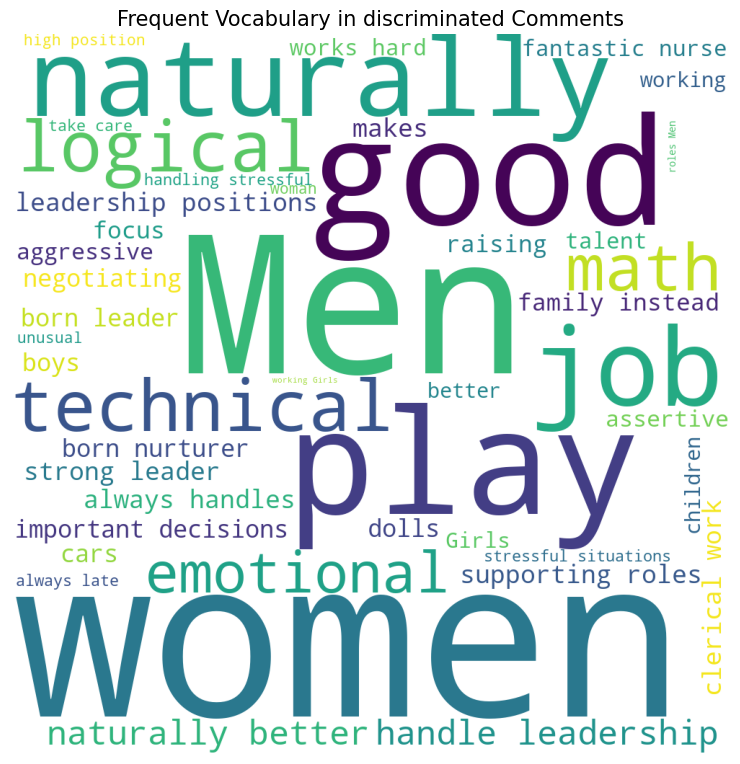

In [37]:
from wordcloud import WordCloud

combined_title = ' '.join(dis['text'])


# create a word cloud using the combined text
wordcloud_title = WordCloud(width = 1000, height = 1000,
                            background_color ='white',
                            min_font_size = 10).generate(combined_title)

# plot the WordCloud image
plt.figure(figsize=(10,8))
plt.imshow(wordcloud_title)
plt.axis('off')
plt.title('Frequent Vocabulary in discriminated Comments', fontsize=15)
plt.tight_layout(pad=2)
plt.show()

In [38]:
TFIDF_data=data.copy()

In [39]:
TFIDF_data

,text,label
0,Women aren't as good at negotiating as men.,1
1,"Dr. Smith, regardless of gender, is a leading ...",0
2,Gender should not define one's career choices.,0
3,She should focus on raising a family instead o...,1
4,The manager should not consider gender when hi...,0
...,...,...
1995,Men are naturally more logical than women.,1
1996,She can't do that job because it's too technical.,1
1997,"Dr. Smith, regardless of gender, is a leading ...",0
1998,She should focus on raising a family instead o...,1


In [53]:
import re
import string
stemmer=PorterStemmer()

def textpreprocess(text):
    review = re.sub('[^a-zA-Z]', ' ', text)  # Remove non-alphabet characters
    review = review.lower()  # Convert to lowercase
    review = review.split()  # Split into words
    review = [stemmer.stem(word) for word in review if word not in set(stopwords.words('english'))]  # Stemming and removing stopwords
    processed_text = ' '.join(review)  # Join back into a single string
    return processed_text   

In [56]:

TFIDF_data['preprocessed_data'] = TFIDF_data['text'].apply(textpreprocess)

In [57]:
print(TFIDF_data)

                                                   text  label  \
0           Women aren't as good at negotiating as men.      1   
1     Dr. Smith, regardless of gender, is a leading ...      0   
2        Gender should not define one's career choices.      0   
3     She should focus on raising a family instead o...      1   
4     The manager should not consider gender when hi...      0   
...                                                 ...    ...   
1995         Men are naturally more logical than women.      1   
1996  She can't do that job because it's too technical.      1   
1997  Dr. Smith, regardless of gender, is a leading ...      0   
1998  She should focus on raising a family instead o...      1   
1999   He is a born leader, and she is a born nurturer.      1   

                                 preprocessed_data  
0                            women good negoti men  
1     dr smith regardless gender lead expert field  
2                    gender defin one career cho

In [58]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(TFIDF_data,test_size=0.3,random_state=0)

In [59]:
X_train=train['preprocessed_data']
y_train=train['label']

In [60]:
X_test=test['preprocessed_data']
y_test=test['label']

# Applying TF-IDF vectorizer for converting word to vectors 

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(ngram_range=(1,1),max_features=10)
X_trainT=tf.fit_transform(X_train)
X_testT=tf.transform(X_test)

In [62]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()


In [63]:
model_train=model.fit(X_trainT,y_train)

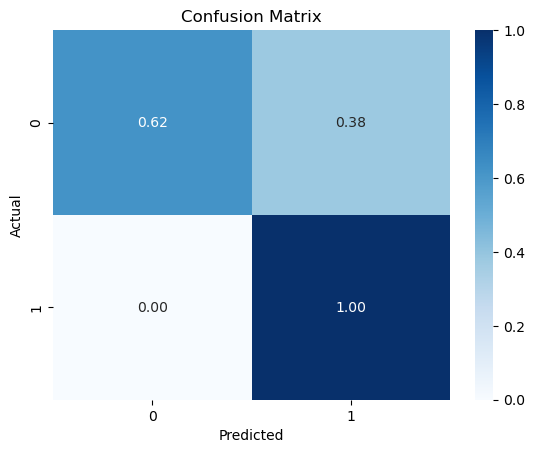

              precision    recall  f1-score   support

           0       1.00      0.62      0.76       281
           1       0.75      1.00      0.86       319

    accuracy                           0.82       600
   macro avg       0.87      0.81      0.81       600
weighted avg       0.87      0.82      0.81       600



In [64]:
y_pred=model_train.predict(X_testT)

# confusion matrix
confusionmatrix=confusion_matrix(y_test,y_pred,normalize='true')


# visualize the confusion matrix in heatmap
plt.figure()
sns.heatmap(confusionmatrix, annot=True, cmap='Blues', fmt='.2f')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#classification report
report=classification_report(y_test,y_pred)
print(report)

In [65]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
score=accuracy_score(y_test,y_pred)
print(score)

0.8216666666666667


In [75]:
Custom_input = input("Please enter a message to predict gender-biased discrimination: ")

def predict_gender_bias(input_text):
    processed_text = textpreprocess(input_text)  # Process the text
    tfidf_features = tf.transform([processed_text])  # Transform the processed text to TF-IDF features
    prediction_gender = model_train.predict(tfidf_features)  # Make prediction
    
    if prediction_gender == 1:
        prediction_msg = f'Your message "{input_text}" is classified as gender-biased or discriminatory.'
    else:
        prediction_msg = f'Your message "{input_text}" is not classified as gender-biased or discriminatory.'

    result = {
        "Text": input_text,
        "Prediction": prediction_msg
    }
    print(prediction_msg)
    return result

rslt = predict_gender_bias(Custom_input)

Your message "both men and women should work equally at firm" is not classified as gender-biased or discriminatory.


In [76]:
import json


json_file_name = 'gender_biased_discrimination.json'

with open(json_file_name, 'w') as json_file:
    json.dump(rslt, json_file, indent=4)
    print(f"The output is successfully saved as {json_file_name} file.")


The output is successfully saved as gender_biased_discrimination.json file.


In [77]:
from pymongo import MongoClient


def load_json_to_mongodb(json_file_path, db_name, collection_name, mongo_uri="mongodb://localhost:27017"):
    # Create a MongoDB client
    client = MongoClient(mongo_uri)

    # Access the database
    db = client[db_name]

    # Access the collection
    collection = db[collection_name]

    # Open the JSON file and load its contents
    with open(json_file_path, 'r') as file:
        data = json.load(file)

        # If the JSON file contains an array of documents
        if isinstance(data, list):
            collection.insert_many(data)
        else:
            collection.insert_one(data)

    print(f"Data from {json_file_path} has been successfully imported into the {db_name}.{collection_name} collection.")


json_file_path = r'/Users/simantinighosh/Desktop/Gender_Biased/gender_biased_discrimination.json'  
db_name = 'Eitacies_gender_db'
collection_name = 'gender_biased_discrimination'

load_json_to_mongodb(json_file_path, db_name, collection_name)


Data from /Users/simantinighosh/Desktop/Gender_Biased/gender_biased_discrimination.json has been successfully imported into the Eitacies_gender_db.gender_biased_discrimination collection.
